#Elective Course: Computational Intelligence and Machine Learning  
### University of Patras

Author: Kristian Louka, Computer Engineering and Informatics Department, CEID Upatras. (louka_kristian@ac.upatras.gr)

###Project 2023-2024 Part B: Restoration of ancient inscriptions using Genetic Algorithms

#B1-GA Design

###a) Encoding the dataset

In this part, we will use the tf-idf method to encode our data.
We will use only the column: region_main_id in order to limit our set of tokens.
Furthermore, we know that our worn out inscription: [...] αλεξανδρε ουδις [...] is found near Greater Syria and the East, so we will use id = 1683.

In [4]:
#Importing the essential libraries for the whole project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randint, rand
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
#Loading the dataset
file_path = 'iphi2802.csv'
df = pd.read_csv(file_path, delimiter='\t')

#Filter inscriptions from region_main_id=1693 -> Greater Syria and the East
region_id = 1693
filtered_df = df[df['region_main_id'] == region_id]

#Extract the text data
inscriptions = filtered_df['text'].tolist()

In [6]:
#Create a TF-IDF vectorizer and fitting it on the inscriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(inscriptions)
dictionary_size = len(vectorizer.vocabulary_)
#Get the vocabulary size
#each row (101) corresponds to an inscription from our dataset.
#each column (1678): Each column corresponds to a unique token in the vocabulary generated by the TfidfVectorizer.
#thats why we used a dictionary in the first place.
print(f'Number of unique tokens: {dictionary_size}')


Number of unique tokens: 1678


In [7]:
X.shape

(127, 1678)

In [8]:
print(X)

  (0, 1373)	0.7071067811865475
  (0, 936)	0.7071067811865475
  (1, 57)	0.3935563734005567
  (1, 372)	0.3935563734005567
  (1, 509)	0.34067816581064186
  (1, 873)	0.3935563734005567
  (1, 240)	0.3935563734005567
  (1, 1473)	0.30974639726519276
  (1, 496)	0.1922302694635105
  (1, 447)	0.3626246048551076
  (2, 579)	0.06297706548388828
  (2, 325)	0.15192783201819776
  (2, 966)	0.09916095840248175
  (2, 1159)	0.15192783201819776
  (2, 442)	0.0925894359562062
  (2, 1587)	0.15192783201819776
  (2, 1541)	0.15192783201819776
  (2, 1451)	0.11957397158971174
  (2, 215)	0.15192783201819776
  (2, 993)	0.15192783201819776
  (2, 271)	0.15192783201819776
  (2, 77)	0.15192783201819776
  (2, 207)	0.15192783201819776
  (2, 766)	0.15192783201819776
  (2, 933)	0.15192783201819776
  :	:
  (125, 1498)	0.11080845999290806
  (125, 455)	0.1719293086336477
  (126, 1627)	0.23196355449688624
  (126, 730)	0.23196355449688624
  (126, 1275)	0.23196355449688624
  (126, 1062)	0.23196355449688624
  (126, 91)	0.231963554

### b-c) Binary Representation & Questions: b (Excess Values) - c (Initial Population):

Represent each word (token) in the dictionary as a binary string.
For a dictionary of size 1678 tokens, you need at least 11 bits to represent each token.

So, every Genotype or Chromosome represents the 2 words that are missing in our problem. We are assuming at they exist in the dictionary.



*  Word 1 is an integer in the range [1,1678]
*  Word 2 is an integer in the same range [1,1678]

We have: [xxxxxxxxxxx][XXXXXXXXXXX] (the order does not matter).
It is obvious that we will have redundant values because 2^11 > 1678.


In [9]:
#binary representantion
def int_to_bin(num, bits=11):
    return format(num, f'0{bits}b')

def bin_to_int(bin_str):
    return int(bin_str, 2)


In [10]:
def initialize_population(pop_size, vocab_size):
    population = []
    for _ in range(pop_size):
        word1_index = randint(1, vocab_size + 1)
        word2_index = randint(1, vocab_size + 1)
        individual = int_to_bin(word1_index) + int_to_bin(word2_index)
        population.append(individual)
    return population

#Function to decode an individual and handle out-of-range values
def decode_individual(individual, vocab_size):
    word1_bin = individual[:11]  # First 11 bits
    word2_bin = individual[11:]  # Second 11 bits

    word1_index = bin_to_int(word1_bin)
    word2_index = bin_to_int(word2_bin)

    #Wrap around using modulo operation
    word1_index = (word1_index % vocab_size) + 1
    word2_index = (word2_index % vocab_size) + 1

    return word1_index, word2_index


#####Example:
Initialize a population of size 20 - As well as one example usage, printing all the pop_size and one validation function to 'validate' that the initial population is indeed in our given space.

In [11]:
#Example: Initialize a population of size 20
vocab_size = 1678
population_size = 20
population = initialize_population(population_size, vocab_size)
print("Initial population:", population)

#Example: Decode the first individual
decoded_individual = decode_individual(population[0], vocab_size)
print("Decoded individual:", decoded_individual)

Initial population: ['0110011010101101110010', '1001001101101100010000', '0110010000010111001110', '0000010101000110111000', '1000001101111001011111', '0000011101001101101000', '1001010100111000000001', '0111011100100110001101', '0101111010100101001100', '0001110101010100010111', '1010111101010011111110', '0101110001010111011011', '0010100011000011010110', '1001000000100100001101', '0001100111010010010110', '1001010110101111011110', '1000110100000100101100', '1100100010100110010000', '0100111010110010100011', '1010100001100100011100']
Decoded individual: (822, 883)


In [12]:
#Example usage
pop_size = 101
vocab_size = 1678
population = initialize_population(pop_size, vocab_size)
#Decode and print the individuals in the population to verify
for i in range(pop_size):
    individual = population[i]
    word1_index, word2_index = decode_individual(individual, vocab_size)
    print(f'Individual: {individual}, Word 1 Index: {word1_index}, Word 2 Index: {word2_index}')

Individual: 0110001110110111100001, Word 1 Index: 798, Word 2 Index: 1506
Individual: 1010101111000010000010, Word 1 Index: 1375, Word 2 Index: 131
Individual: 0111110110110101100001, Word 1 Index: 1006, Word 2 Index: 1378
Individual: 0011101001111000000011, Word 1 Index: 468, Word 2 Index: 1540
Individual: 1010010001101000111101, Word 1 Index: 1316, Word 2 Index: 574
Individual: 1001111001100001011010, Word 1 Index: 1268, Word 2 Index: 91
Individual: 1000110110111001101100, Word 1 Index: 1134, Word 2 Index: 1645
Individual: 1011010101001010100000, Word 1 Index: 1451, Word 2 Index: 673
Individual: 0101011101001010011111, Word 1 Index: 699, Word 2 Index: 672
Individual: 1000100011001001011011, Word 1 Index: 1095, Word 2 Index: 604
Individual: 1011010000000110000001, Word 1 Index: 1441, Word 2 Index: 386
Individual: 0001010110110111000010, Word 1 Index: 174, Word 2 Index: 1475
Individual: 1100010110110000101010, Word 1 Index: 1582, Word 2 Index: 1067
Individual: 0001011100110000110101, W

In [13]:
#Validate the decoded population
def validate_population(population, vocab_size):
    for individual in population:
        word1, word2 = decode_individual(individual, vocab_size)
        if word1 < 1 or word1 > vocab_size or word2 < 1 or word2 > vocab_size:
            return False
    return True

#Example: Validate the initial population
is_valid = validate_population(population, vocab_size)
print("Is the initial population valid?", is_valid)


Is the initial population valid? True


###d) Calculation of Similarity
We will use the vectorization process again to ensure the given inscription is included in the TF-IDF matrix.

This allows the cosine similarity to be computed between the given inscription and all other inscriptions in the same vector space.

I have taken both top-10 and top-5 most similar inscriptions, but I can see that the last one, top-5, is more important (because only 3 inscription indices have similarity more than 0)

In [14]:
print(inscriptions)
print(X)

['μαναημος. σιμων.', 'εισιν εν τη αψιδι κρηπιδες εξ διαφερουσαι αιδεσιω.', 'εξεδρων δυειν εκ τουδε του σπηλαιου του ταφαιωνος εισιοντων το του σπηλαιου θυρωμα εν δεξιοις και εωνιμοις συν δικαιοις πασι εξεχωρησεν ιουλιος αυρηλιος ιεδειβηλος αβισαμαια του μαλχη ιουλια αυρηλια αμαθη βολαζαιου του μοκιμου αυτη τε και υιοις και υωνοις εις το παντελες μηνι δαισιω του ετους.', 'αχρι απεψηφισαμεν εριδιν ποκων ελογισθη κερμα.', '---------------- παρασταρωμανω ιατρος ο φιλοχριστος γεβαλων και τενου εις τας εξοδους και εισοδους αυτου.', 'βαριβα μαρωνας εζη ετων.', 'αυρηλιος σεπτιμιος ευτυχ[ου] υιος ειρηναιος κολων λαο[δι]κευς μητροπολειτης κα[ι] αλλων πολεων πολειτης μ[ο]νος εγω εκ της εαυτου πατριδ[ος] απο πασης κρισεως αγωνισαμενος και νεικησας τους υποτεταγμενους αγωνας εν αυγουστη καισαρεια σεουηρειον οικουμενικον πυθικον πυγμην αυγουστου ακτια εν νεικοπολει της περιοδου παιδων πυγμην εν καισαρεια ισακτιον παιδων πυγμην εν τυρω ηρακλεια κομμοδεια παιδων πυγμην εν ταρσω ισολυμπιον οικουμενικον

In [15]:
#Given inscription with the missing parts
given_inscription = '[---] αλεξανδρε ουδις [---]'

#Append the given inscription to the inscriptions list for vectorization
inscriptions.append(given_inscription)

#Create a TF-IDF vectorizer and fit it on the inscriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(inscriptions)

In [16]:
print(inscriptions)

['μαναημος. σιμων.', 'εισιν εν τη αψιδι κρηπιδες εξ διαφερουσαι αιδεσιω.', 'εξεδρων δυειν εκ τουδε του σπηλαιου του ταφαιωνος εισιοντων το του σπηλαιου θυρωμα εν δεξιοις και εωνιμοις συν δικαιοις πασι εξεχωρησεν ιουλιος αυρηλιος ιεδειβηλος αβισαμαια του μαλχη ιουλια αυρηλια αμαθη βολαζαιου του μοκιμου αυτη τε και υιοις και υωνοις εις το παντελες μηνι δαισιω του ετους.', 'αχρι απεψηφισαμεν εριδιν ποκων ελογισθη κερμα.', '---------------- παρασταρωμανω ιατρος ο φιλοχριστος γεβαλων και τενου εις τας εξοδους και εισοδους αυτου.', 'βαριβα μαρωνας εζη ετων.', 'αυρηλιος σεπτιμιος ευτυχ[ου] υιος ειρηναιος κολων λαο[δι]κευς μητροπολειτης κα[ι] αλλων πολεων πολειτης μ[ο]νος εγω εκ της εαυτου πατριδ[ος] απο πασης κρισεως αγωνισαμενος και νεικησας τους υποτεταγμενους αγωνας εν αυγουστη καισαρεια σεουηρειον οικουμενικον πυθικον πυγμην αυγουστου ακτια εν νεικοπολει της περιοδου παιδων πυγμην εν καισαρεια ισακτιον παιδων πυγμην εν τυρω ηρακλεια κομμοδεια παιδων πυγμην εν ταρσω ισολυμπιον οικουμενικον

In [17]:
#print(X)
print(X.shape)
#+1 token, probably because ουδίς is a common word in ancient greek.

(128, 1679)


In [18]:
#Calculate the cosine similarity of the given inscription (which will be in the last place (length(inscription) - 1 )) to all others
given_inscription_index = len(inscriptions) - 1  # Index of the given inscription
cosine_similarities = cosine_similarity(X[given_inscription_index], X[:-1]).flatten()


####Top-10_indices

In [19]:
#Find top-10 most similar inscriptions (excluding the given one itself)
#This takes the last 10 elements from the sorted indices. Since .argsort() sorts in ascending order, [-10:] gets the indices of the 10 highest similarity scores.
top_10_indices = cosine_similarities.argsort()[-10:][::-1]
top_10_similarities = cosine_similarities[top_10_indices]


In [20]:
#Print the top-10 most similar inscriptions
print("Top-10 most similar inscriptions based on cosine similarity:")
for i, index in enumerate(top_10_indices):
    print(f"Rank {i+1}: Inscription {index}, Similarity: {top_10_similarities[i]:.4f}")
    print(f"Inscription Text: {inscriptions[index]}")

Top-10 most similar inscriptions based on cosine similarity:
Rank 1: Inscription 27, Similarity: 0.2744
Inscription Text: μνεμιον πετρος οτιο ετους τκβ περετιου. θαρσι ουδις αθανοτας. θανοντ[ος] ας ετων θαρσι ουδις αθανατος.
Rank 2: Inscription 56, Similarity: 0.1607
Inscription Text: μνημιον πετρου ουλπιανου αποθανοντος ετων εξηκοντα εν ετι σπγ εν μηνι ξανθικω λ θαρσι ουδις αθανατος.
Rank 3: Inscription 18, Similarity: 0.1410
Inscription Text: εις θεος ο παντων δεσποτης. μνημιον ελλαδιου σαβα αποθανοντος μετα καλου ονοματος και καλης πιστεως ετων δ μηνος διου ε ημερα του. θαρσι ουδις αθανατος.
Rank 4: Inscription 126, Similarity: 0.0000
Inscription Text: η βουλ[η και ο δημος ι]ουλιον αυρηλιο[ν σαλαμα]λλαθον μαλη [του αβδαιου α]ρχεμπορον ανακομισ[αντα την συν]οδιαν προικα εξ ιδ[ιων] τειμης χαριν ετους.
Rank 5: Inscription 45, Similarity: 0.0000
Inscription Text: μνησθη αννιανος δοφλικαρις ο επισταθις του εργου και ευειλατον ε[χ]ο[ι] την θεαν.
Rank 6: Inscription 34, Similarity: 0.0000


####Top-5_indices

In [21]:
#Find top-5 most similar inscriptions (excluding the given one itself)
top_5_indices = cosine_similarities.argsort()[-5:][::-1]
top_5_similarities = cosine_similarities[top_5_indices]

#Print the top-5 most similar inscriptions
print("Top-5 most similar inscriptions based on cosine similarity:")
for i, index in enumerate(top_5_indices):
    print(f"Rank {i+1}: Inscription {index}, Similarity: {top_5_similarities[i]:.4f}")
    print(f"Inscription Text: {inscriptions[index]}")

Top-5 most similar inscriptions based on cosine similarity:
Rank 1: Inscription 27, Similarity: 0.2744
Inscription Text: μνεμιον πετρος οτιο ετους τκβ περετιου. θαρσι ουδις αθανοτας. θανοντ[ος] ας ετων θαρσι ουδις αθανατος.
Rank 2: Inscription 56, Similarity: 0.1607
Inscription Text: μνημιον πετρου ουλπιανου αποθανοντος ετων εξηκοντα εν ετι σπγ εν μηνι ξανθικω λ θαρσι ουδις αθανατος.
Rank 3: Inscription 18, Similarity: 0.1410
Inscription Text: εις θεος ο παντων δεσποτης. μνημιον ελλαδιου σαβα αποθανοντος μετα καλου ονοματος και καλης πιστεως ετων δ μηνος διου ε ημερα του. θαρσι ουδις αθανατος.
Rank 4: Inscription 126, Similarity: 0.0000
Inscription Text: η βουλ[η και ο δημος ι]ουλιον αυρηλιο[ν σαλαμα]λλαθον μαλη [του αβδαιου α]ρχεμπορον ανακομισ[αντα την συν]οδιαν προικα εξ ιδ[ιων] τειμης χαριν ετους.
Rank 5: Inscription 45, Similarity: 0.0000
Inscription Text: μνησθη αννιανος δοφλικαρις ο επισταθις του εργου και ευειλατον ε[χ]ο[ι] την θεαν.


###e) Fitness Function
The fitness function evaluates how well an individual (pair of words) completes the given inscription by measuring its similarity to other inscriptions in the dataset.

After we have initialized the population, we continue:

In [22]:
print(inscriptions)

['μαναημος. σιμων.', 'εισιν εν τη αψιδι κρηπιδες εξ διαφερουσαι αιδεσιω.', 'εξεδρων δυειν εκ τουδε του σπηλαιου του ταφαιωνος εισιοντων το του σπηλαιου θυρωμα εν δεξιοις και εωνιμοις συν δικαιοις πασι εξεχωρησεν ιουλιος αυρηλιος ιεδειβηλος αβισαμαια του μαλχη ιουλια αυρηλια αμαθη βολαζαιου του μοκιμου αυτη τε και υιοις και υωνοις εις το παντελες μηνι δαισιω του ετους.', 'αχρι απεψηφισαμεν εριδιν ποκων ελογισθη κερμα.', '---------------- παρασταρωμανω ιατρος ο φιλοχριστος γεβαλων και τενου εις τας εξοδους και εισοδους αυτου.', 'βαριβα μαρωνας εζη ετων.', 'αυρηλιος σεπτιμιος ευτυχ[ου] υιος ειρηναιος κολων λαο[δι]κευς μητροπολειτης κα[ι] αλλων πολεων πολειτης μ[ο]νος εγω εκ της εαυτου πατριδ[ος] απο πασης κρισεως αγωνισαμενος και νεικησας τους υποτεταγμενους αγωνας εν αυγουστη καισαρεια σεουηρειον οικουμενικον πυθικον πυγμην αυγουστου ακτια εν νεικοπολει της περιοδου παιδων πυγμην εν καισαρεια ισακτιον παιδων πυγμην εν τυρω ηρακλεια κομμοδεια παιδων πυγμην εν ταρσω ισολυμπιον οικουμενικον

In [23]:
#Function to construct the completed inscription
def construct_inscription(given_inscription, word1, word2, vectorizer):
    words = list(vectorizer.vocabulary_.keys())
    word1_text = words[word1 - 1]
    word2_text = words[word2 - 1]
    completed_inscription = given_inscription.replace('[---]', word1_text, 1).replace('[---]', word2_text, 1)
    return completed_inscription

In [24]:
#Function to calculate the fitness score
def fitness(individual, given_inscription, vectorizer, X):
    word1_index, word2_index = decode_individual(individual, vocab_size)
    completed_inscription = construct_inscription(given_inscription, word1_index, word2_index, vectorizer)
    print("Constructed Inscription:", completed_inscription)
    completed_vector = vectorizer.transform([completed_inscription])
    similarities = cosine_similarity(completed_vector, X[:-1]).flatten()
    top_5_indices = similarities.argsort()[-5:][::-1]
    top_5_similarities = similarities[top_5_indices]
    fitness_score = np.mean(top_5_similarities)
    return fitness_score, top_5_indices

####Example:

In [25]:
print(vectorizer.vocabulary_)


{'μαναημος': 937, 'σιμων': 1374, 'εισιν': 448, 'εν': 497, 'τη': 1474, 'αψιδι': 241, 'κρηπιδες': 874, 'εξ': 510, 'διαφερουσαι': 373, 'αιδεσιω': 57, 'εξεδρων': 512, 'δυειν': 406, 'εκ': 456, 'τουδε': 1500, 'του': 1499, 'σπηλαιου': 1390, 'ταφαιωνος': 1450, 'εισιοντων': 450, 'το': 1489, 'θυρωμα': 722, 'δεξιοις': 344, 'και': 800, 'εωνιμοις': 621, 'συν': 1418, 'δικαιοις': 379, 'πασι': 1182, 'εξεχωρησεν': 514, 'ιουλιος': 769, 'αυρηλιος': 210, 'ιεδειβηλος': 740, 'αβισαμαια': 8, 'μαλχη': 934, 'ιουλια': 767, 'αυρηλια': 208, 'αμαθη': 78, 'βολαζαιου': 272, 'μοκιμου': 994, 'αυτη': 216, 'τε': 1452, 'υιοις': 1542, 'υωνοις': 1588, 'εις': 443, 'παντελες': 1160, 'μηνι': 967, 'δαισιω': 326, 'ετους': 580, 'αχρι': 240, 'απεψηφισαμεν': 153, 'εριδιν': 551, 'ποκων': 1229, 'ελογισθη': 488, 'κερμα': 843, 'παρασταρωμανω': 1169, 'ιατρος': 727, 'φιλοχριστος': 1607, 'γεβαλων': 293, 'τενου': 1463, 'τας': 1446, 'εξοδους': 517, 'εισοδους': 452, 'αυτου': 229, 'βαριβα': 249, 'μαρωνας': 947, 'εζη': 431, 'ετων': 581, 'σεπτ

In [26]:
print(given_inscription)

[---] αλεξανδρε ουδις [---]


In [27]:
#given_inscription = '[---] αλεξανδρε ουδις [---]'
individual = population[0]
fitness_score, top_5_indices = fitness(individual, given_inscription, vectorizer, X)

print("Fitness score of the individual:", fitness_score)
print("Top-5 indices of the most similar inscriptions:", top_5_indices)

print("Top-5 most similar inscriptions based on cosine similarity:")
for i, index in enumerate(top_5_indices):
    print(f"Rank {i+1}: Inscription {index}, Similarity: {cosine_similarity(X[index], X[-1]).flatten()[0]:.4f}")
    print(f"Inscription Text: {inscriptions[index]}")

Constructed Inscription: υιου αλεξανδρε ουδις προσφοραν
Fitness score of the individual: 0.11747950429645988
Top-5 indices of the most similar inscriptions: [ 27  14  56  18 109]
Top-5 most similar inscriptions based on cosine similarity:
Rank 1: Inscription 27, Similarity: 0.2744
Inscription Text: μνεμιον πετρος οτιο ετους τκβ περετιου. θαρσι ουδις αθανοτας. θανοντ[ος] ας ετων θαρσι ουδις αθανατος.
Rank 2: Inscription 14, Similarity: 0.0000
Inscription Text: διι ηλ[ι]οπολιτη υπερ της σ[ωτ]ηριας κα[ισαρ]ος αδρια[νου κα]ισα[ρος τραιανου υιου ---].
Rank 3: Inscription 56, Similarity: 0.1607
Inscription Text: μνημιον πετρου ουλπιανου αποθανοντος ετων εξηκοντα εν ετι σπγ εν μηνι ξανθικω λ θαρσι ουδις αθανατος.
Rank 4: Inscription 18, Similarity: 0.1410
Inscription Text: εις θεος ο παντων δεσποτης. μνημιον ελλαδιου σαβα αποθανοντος μετα καλου ονοματος και καλης πιστεως ετων δ μηνος διου ε ημερα του. θαρσι ουδις αθανατος.
Rank 5: Inscription 109, Similarity: 0.0000
Inscription Text: αγιε γεω

###f) Genetic Operators:

1.   Selection

  Roulette Wheel Selection

  Rank-Based Selection

  **Tournament Selection**
2.   Crossover

  **Single-Point Crossover**

  Multi-Point Crossover

  Uniform Crossover

3.   Mutation

  **Elitism**







In [28]:
#Genetic Algorithm Operators

#Tournament Selection:
def tournament_selection(population, fitnesses, k=3):
    selected = []
    for _ in range(len(population)):
        aspirants = [randint(0, len(population)) for _ in range(k)]
        selected.append(max(aspirants, key=lambda idx: fitnesses[idx]))
    return [population[i] for i in selected]


In [29]:
def single_point_crossover(parent1, parent2, crossover_prob):
    if rand() < crossover_prob:
        point = randint(1, len(parent1) - 1)
        offspring1 = parent1[:point] + parent2[point:]
        offspring2 = parent2[:point] + parent1[point:]
    else:
        offspring1, offspring2 = parent1, parent2  #No crossover, parents are -> copied
    return offspring1, offspring2


In [30]:
#Mutation with Elitism
def mutate(individual, mutation_rate=0.01):
    mutated = list(individual)
    for i in range(len(mutated)):
        if rand() < mutation_rate:
            mutated[i] = int_to_bin(randint(1, vocab_size + 1), 11)  # Mutate with a new random gene
    return ''.join(mutated)

def apply_elitism(population, fitnesses, num_elites=2):
    elite_indices = sorted(range(len(fitnesses)), key=lambda i: fitnesses[i], reverse=True)[:num_elites]
    return [population[i] for i in elite_indices]


#B2-GA Implementation -> Β3

#B3-Evaluation

####**Genetic Algorithm:**

In [31]:
def genetic_algorithm(given_inscription, vectorizer, X, pop_size, num_generations, mutation_rate, crossover_prob, num_elites, tournament_size, target_fitness=None):
    population = initialize_population(pop_size, vocab_size)
    fitness_history = []
    best_fitness_history = []

    for generation in range(num_generations):
        fitnesses = [fitness(individual, given_inscription, vectorizer, X)[0] for individual in population]
        fitness_history.append(np.mean(fitnesses))
        best_fitness_history.append(max(fitnesses))

        if target_fitness and max(fitnesses) >= target_fitness:
            break

        #Elitism
        new_population = apply_elitism(population, fitnesses, num_elites)

        #Tournament Selection
        selected_individuals = tournament_selection(population, fitnesses, k=tournament_size)

        #Offspring through Crossover and Mutation
        while len(new_population) < pop_size:
            parent1, parent2 = selected_individuals[randint(0, len(selected_individuals))], selected_individuals[randint(0, len(selected_individuals))]
            offspring1, offspring2 = single_point_crossover(parent1, parent2, crossover_prob)
            new_population.extend([mutate(offspring1, mutation_rate), mutate(offspring2, mutation_rate)])

        #Ensure population size stays constant
        population = new_population[:pop_size]

    #Return the best individual from the final population
    fitnesses = [fitness(individual, given_inscription, vectorizer, X)[0] for individual in population]
    best_index = max(range(len(fitnesses)), key=lambda i: fitnesses[i])
    return population[best_index], fitnesses[best_index], fitness_history, best_fitness_history


####Parameters for running the GA

In [47]:
#Parameters for running the GA
pop_size = 200
num_generations = 100
crossover_prob = 0.1
mutation_rate = 0.01
num_elites = 2
tournament_size = 3
runs_per_setting = 10

###Running the algorithm:

In [48]:
# Store results
results = []

for run in range(runs_per_setting):
    best_individual, best_fitness, fitness_history, best_fitness_history = genetic_algorithm(
        given_inscription, vectorizer, X, pop_size, num_generations, mutation_rate, crossover_prob, num_elites, tournament_size
    )
    results.append((best_individual, best_fitness, fitness_history, best_fitness_history))
    print(f"Run {run + 1}: Best fitness = {best_fitness}")

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις σαμειαν
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις ποιησ
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις τριαδι
Constructed Inscription: αμην αλεξανδρε ουδις την
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις εινα
Constructed Inscription: ρομανυς αλεξανδρε ουδις ωσιωτατου
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
Constructed Inscription: ρομανυς αλεξανδρε ουδις ολυμπιο

###Plotting the curves

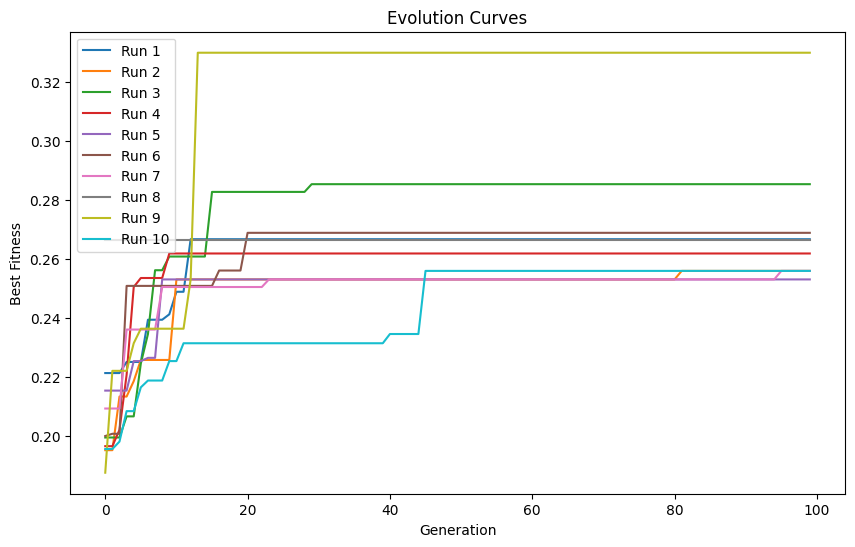

Average Best Fitness over 10 runs: 0.26989570797641854


In [49]:
# Plot evolution curves for each run
plt.figure(figsize=(10, 6))
for run, (best_individual, best_fitness, fitness_history, best_fitness_history) in enumerate(results):
    plt.plot(best_fitness_history, label=f'Run {run + 1}')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution Curves')
plt.legend()
plt.show()

# Summarize results
average_best_fitness = np.mean([result[1] for result in results])
print(f"Average Best Fitness over {runs_per_setting} runs: {average_best_fitness}")

###Printing the new constructed inscription:

In [50]:
# Print resulting inscription for the best individual in each run
for run, (best_individual, best_fitness, fitness_history, best_fitness_history) in enumerate(results):
    word1_index, word2_index = decode_individual(best_individual, vocab_size)
    resulting_inscription = construct_inscription(given_inscription, word1_index, word2_index, vectorizer)
    print(f"Run {run + 1} - Resulting Inscription: {resulting_inscription}")

Run 1 - Resulting Inscription: ροσταξιν αλεξανδρε ουδις θαρσι
Run 2 - Resulting Inscription: αζεο αλεξανδρε ουδις ολυμπιοδωρος
Run 3 - Resulting Inscription: θαρσι αλεξανδρε ουδις ολυμπιοδωρος
Run 4 - Resulting Inscription: χμγ αλεξανδρε ουδις αλυπε
Run 5 - Resulting Inscription: γεοποθρος αλεξανδρε ουδις θαρσι
Run 6 - Resulting Inscription: εργο αλεξανδρε ουδις ολυμπιοδωρος
Run 7 - Resulting Inscription: γεοποθρος αλεξανδρε ουδις ολυμπιοδωρος
Run 8 - Resulting Inscription: μνησθη αλεξανδρε ουδις θαρσι
Run 9 - Resulting Inscription: αλυπε αλεξανδρε ουδις χαιρε
Run 10 - Resulting Inscription: ρομανυς αλεξανδρε ουδις ολυμπιοδωρος
